Reading Number                              2501
Reading Number                              2501
 Reading Type                   Moisture Reading
 Date                                    4/11/23
 Time                                   14:31:29
 Volumetric Moisture %                        39
 K Value                                    25.2
 Zero Time (ps)                            28985
 Start Time (ps)                            4100
 End Time (ps)                              5438
 Delta Time (ps)                            1338
 Interval Time (ps)                           20
 Probe Index                                   1
 Probe Type                                  BUR
 Probe Length (cm)                           7.8
 Moisture Table Index                          1
 Moisture Table Name                        SOIL
 Temperature Depth 1                           0
 Temperature 1                                 0
 Temperature Depth 2                          -1
 Temperature 2      

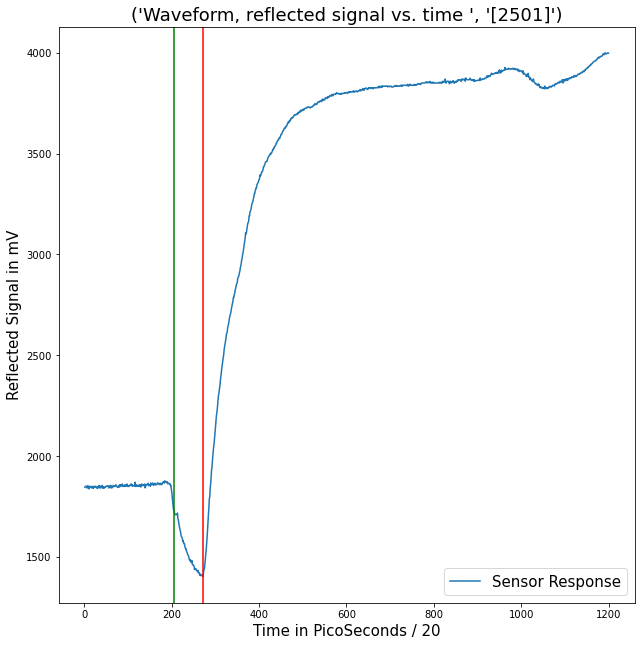

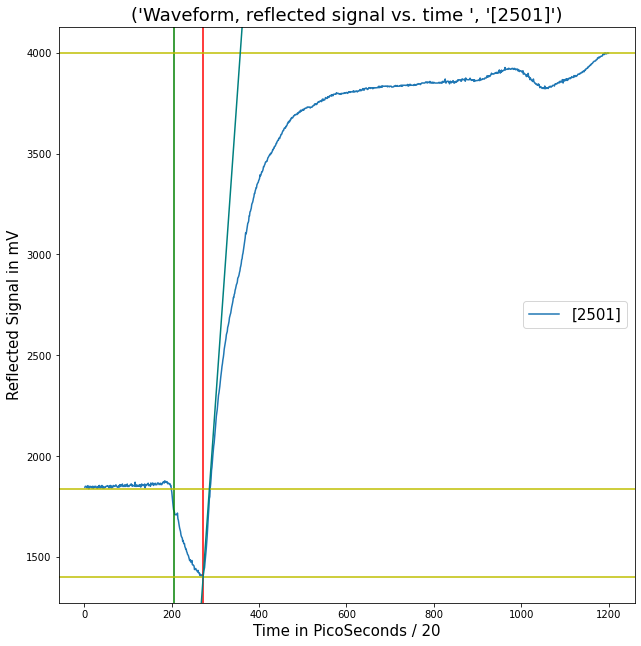

In [24]:
import numpy as np
from numpy import log as ln
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from IPython.display import display, Math, Latex

##

#Bring in raw data
#Make sure the the mini Trace TDR csv file is converted to UTF-8 Encoding
#select rows to keep, alway keep row 2, second row is the select waveform

rk = 28 #row to keep

rows_to_keep = [2,rk]
wf_rawB = pd.read_csv('waveform_raw053123.csv', skiprows= lambda x: x not in rows_to_keep).T
header_row = 0
wf_rawB.columns = wf_rawB.iloc[header_row]

#Create name of sample
ch_sample = str(wf_rawB.columns.values.tolist())
title = "Waveform, reflected signal vs. time ", ch_sample

print(wf_rawB.head(36))


rows_to_keep = [2,rk]
wf_rawA = pd.read_csv('waveform_raw053123.csv', skiprows= lambda x: x not in rows_to_keep).T
header_row = 0
wf_rawA.columns = wf_rawB.iloc[header_row]

wf_rawA.reset_index(drop=True, inplace=True)
wf_rawA.index = np.arange(1,len(wf_rawA)+1)
wf_rawA.reset_index(inplace=True)
wf_rawA.set_axis(['Time', 'Sam'],axis=1,inplace=True)

#Get Variables variables from imput data 
#Pull out sample number and info



###ENTER Start and Finish Time if times need adjusting
#t_s = 4100
#t_f = 24000
#L = 0.078
Ref_EC = 99997
#Start Time
t_start = wf_rawA[wf_rawA['Time'] == 8]['Sam']
#Finish Time
t_finish = wf_rawA[wf_rawA['Time'] == 9]['Sam']

##### Hash/UnHash if TRACE times are OK
t_s = int(t_start) #un-hash to use Trace start time
t_f = int(t_finish) #un hash if you don't have to manually change tf

Probe_L = float(wf_rawA[wf_rawA['Time'] == 14]['Sam'])
L = Probe_L/100

       
       
print("Sample number is:   ", ch_sample)       
print("Finnish Time reported by Trace is" , t_f)


# Value sfrom Trace

ch_sample = (str(ch_sample)).strip()
Ka_trace = float(wf_rawA[wf_rawA['Time'] == 6]['Sam'])
sol_number = (str((wf_rawA[wf_rawA['Time'] == 28]['Sam']))).strip(' Name: am, dtype: object\n')

Date = str((wf_rawA[wf_rawA['Time'] == 3]['Sam'])).strip('\nName: Sam, dtype: object' )
Time = str((wf_rawA[wf_rawA['Time'] == 4]['Sam'])).strip('\nName: Sam, dtype: object')
Volumetric = float(wf_rawA[wf_rawA['Time'] == 5]['Sam'])
Zero_Time = int(wf_rawA[wf_rawA['Time'] == 7]['Sam'])
int_time= int(wf_rawA[wf_rawA['Time'] == 11]['Sam'])
Probee_index = int(wf_rawA[wf_rawA['Time'] == 12]['Sam'])
Probe_type = str((wf_rawA[wf_rawA['Time'] == 13]['Sam'])).strip('12    \nName: Sam, dtype: object')
Probe_L = float(wf_rawA[wf_rawA['Time'] == 14]['Sam'])

#for graphing
t_sg = (t_s /int_time)
t_fg = (t_f /int_time)


print("Ka reported by Trace is" , Ka_trace)
print("Start Time Used" , t_s)
#Time of Flight
t_flight = wf_rawA[wf_rawA['Time'] == 10]['Sam']
print("Time of Flight reported by Trace is" , t_flight)
print("Sample ID is  ", ch_sample)
print("Solution Number is  ", sol_number)
print("Interval time is   ", int_time)





#get Waveform data
wf_rawB.reset_index(drop=True, inplace=True)
wf = wf_rawB.drop(labels=range(0, 29), axis=0)

wf.index = np.arange(1,len(wf)+1)
wf.reset_index(inplace=True)
wf.set_axis(['Time', 'Sam'],axis=1,inplace=True)


#Make Graphs

x = wf['Time']
y = wf['Sam']



fig_w = plt.figure(figsize=(8,8))
axes_4 = fig_w.add_axes([0,0,1,1]) #this means you want the whole array
axes_4.set_xlabel('Time in PicoSeconds / 20' ,fontsize=15)
axes_4.set_ylabel('Reflected Signal in mV',fontsize=15)
axes_4.set_title(title ,fontsize=18)

axes_4.plot(x, y, label='Sensor Response')
axes_4.legend(loc='best',fontsize=15)



plt.axvline(x = t_sg, color = 'g', label = 'Start Time')
plt.axvline(x = t_fg, color = 'r', label = 'Finish Time')


print("t_sg time of start is  ", t_sg)
print("t_fg time of finish is  ", t_fg) 

# percent moisture from Topp

#Start Time in seconds
tsa = t_s/1000000000000
#Finish Time in Seconds
tfa = t_f/1000000000000
t_dif = tfa - tsa

#Speed of light in vacuum m/s
c = 299792458
#Length of waveguide in meters


#Apparent Permetivity for wet sand
Ka = ((t_dif * c)/L)**2


#Topp Equation 

topp_wfv = (-530 + 292*Ka - 5.5*Ka**2 + .043*Ka**3)/100
print("The soil moisture is ", topp_wfv,"%")
print("The permittivity is ", Ka)


#Calculate the Voltages at the Key times

v0 = int(wf[wf['Time'] == int(10)]['Sam'])
print("v0 is   ",v0)

v1a = min(wf['Sam'])
print("v1a is ", v1a)

v1 = int(wf[wf['Time'] == int(t_sg)]['Sam'])
print("v1 is   ",v1)

v3 = int(wf[wf['Time'] == int(t_fg)]['Sam'])
print("v3 is     ", v3)



#Slope after the final time


   
rolltime_frame = 20

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err  = linregress(x,y)
    return slope


wf['rolling_slope'] = wf['Sam'].rolling(window=rolltime_frame, center=True,
                               min_periods=rolltime_frame).apply(get_slope)

  
sf = wf.loc[wf['Time'] > t_fg, 'rolling_slope'].max()

print("sf is   ",sf)

vf = int(wf[wf['Time'] >t_fg]['Sam'].max())
print("vf is  ", vf)

 


vr = vf - v3

print("vr based on v1 is  ", vr)
print( "Ka is    ", Ka)
print("Ka reported by Trace is" , Ka_trace)




x = wf['Time']
y = wf['Sam']

fig_w = plt.figure(figsize=(8,8))
axes_4 = fig_w.add_axes([0,0,1,1]) #this means you want the whole array
axes_4.set_xlabel('Time in PicoSeconds / 20' ,fontsize=15)
axes_4.set_ylabel('Reflected Signal in mV',fontsize=15)
axes_4.set_title(title ,fontsize=18)
axes_4.plot(x, y, label= ch_sample)
axes_4.legend(loc='best',fontsize=15)



plt.axvline(x = t_sg, color = 'g', label = 'Start Time')
plt.axvline(x = t_fg, color = 'r', label = 'Finish Time')

#plt.axhline(y = v1, color = 'k', label = 'v1')
plt.axhline(y = v3, color = 'y', label = 'Finish Time')
plt.axhline(y = vf, color = 'y', label = 'Max Time')
plt.axhline(y = v0, color = 'y', label = 'v0')

plt.axline((t_fg, v3), slope=sf, color='teal', label='slope')

#plt.axhline(y = v1a, color = 'k', label = 'v1a')






print("t_sg time of start is  ", t_sg)
print("t_fg time of finish is  ", t_fg)

#Dalton 1986
#Make EC Dalton 0 if it is negative
def ec_dalton(Ka, L, v3, vr):
    EC_Daltona = ((Ka**0.5)/(120*3.14*L))*ln(v3/vr)
    if EC_Daltona < 0:
        EC_Daltona = 0
    return EC_Daltona

EC_Dalton = ec_dalton(Ka, L, v3, vr) 


print("Dalton 1986 EC is ", EC_Dalton)

#Topp 1988
#Make EC Topp 0 if negative
def ec_topp(Ka, L, v3, vr, v0):
    EC_Toppa = ((Ka**0.5)/(120*3.14*L))*ln((v3*(2*v0-v3))/(v0*vr))
    if EC_Toppa < 0:
        EC_Toppa = 0
    return EC_Toppa

ECtopp = ec_topp(Ka, L, v3, vr, v0) 
print("Topp 1988 EC is ", ECtopp)


#Make Export DF

report_df = pd.DataFrame({'ch_sample':[ch_sample],
                          'sol_number':[sol_number],
                          'Date':[Date],
                          #'Time':[Time],
                          'Ref_EC':[Ref_EC],
                          'Volumetric':[Volumetric],
                          'Ka_trace':[Ka_trace],
                          'Zero_Time':[Zero_Time],
                          't_s':[t_s],
                          't_f':[t_f],
                          't_dif':[t_dif],
                          'int_time':[int_time],
                          'Probee_index':[Probee_index],
                          'Probe_type':[Probe_type],
                          'Probe_L':[Probe_L],
                          'L':[L],
                          'Ka':[Ka], 
                          'v0':[v0], 
                          'v1a':[v1a],
                          'v1':[v1],
                          'sf':[sf], 
                          'v3':[v3],
                          'vf':[vf],
                          'vr':[vr],
                          'EC_Dalton':[EC_Dalton],
                          'ECtopp':[ECtopp]})








In [17]:
wf_rawB.head(35)

Reading Number,2677
0,2677
1,Moisture Reading
2,5/30/23
3,15:02:27
4,100
5,45.4
6,29285
7,4100
8,5897
9,1797


In [10]:
print(v0)

3779
